# Week 7
## RandomForest

When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are **noise, variance, and bias**. Ensemble helps to reduce these factors (except noise, which is irreducible error).
- **Ensemble** is a collection of predictors which are combined together to generate the final prediction. 



- **Bagging** is a simple ensembling technique in which we build many independent predictors/models/learners and combine them using some model averaging techniques. (e.g. weighted average, majority vote or normal average)


- Because **Bagging** technique takes many uncorrelated learners to make a final model, it reduces error by reducing variance. Example of bagging ensemble is Random Forest models.

**Random Forest** is an example of bagging. 

**Random Forest** is Ensemble Machine Learning: Weak Learners come together to form Strong Learns with lower variance and better performance


- Reduces variance with minimal increase in bias


- Difficult to interpret and lack of transperancy as compared to decision tree
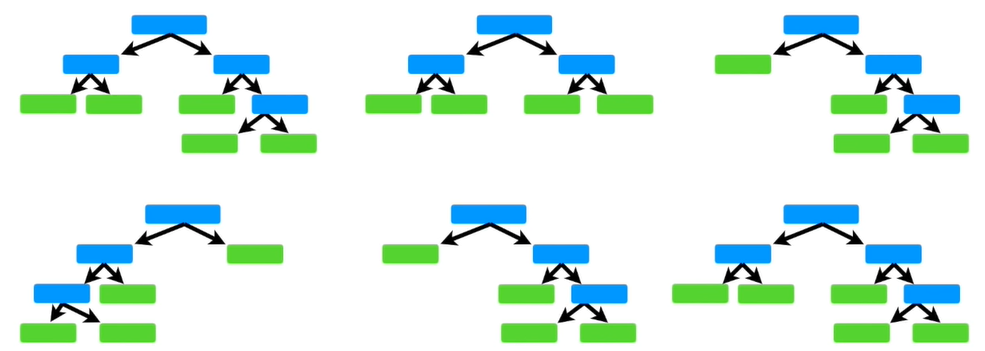

### Training 
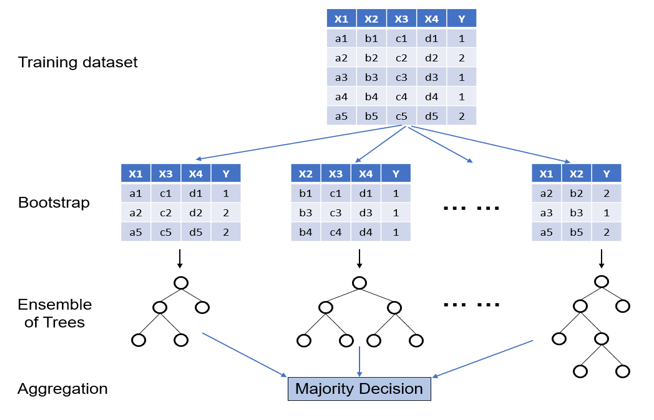

### Step 1: Create Bootstrapped Dataset

Randomly select samples such that one sample can be selected more than once. 

### Step 2: Create DT using bootstrapped dataset and split nodes using random subset of features

> Number of features in subset features is around the square root of the number of total features

### Step 3: Repeat Steps 1 and 2 to produce variety of trees

Variety of trees lowers variance and is better than individual decision trees


### Step 4: Run out-of-bag samples through all the trees that were created without those samples for purposes of accuracy quantification (out-of-bag error)

Out-of-bag errors help avoid the need for an independent validation dataset, but often underestimates actual performance.

OOB error is the mean prediction error on each training sample xᵢ, using only the trees that did not have xᵢ in their bootstrap sample.

### Step 5: During deployment, a class/label is assgined by aggregating the majority class predicted by the bootstrapped tree

Bootstrap + Aggregate to make a decision is called Bagging 
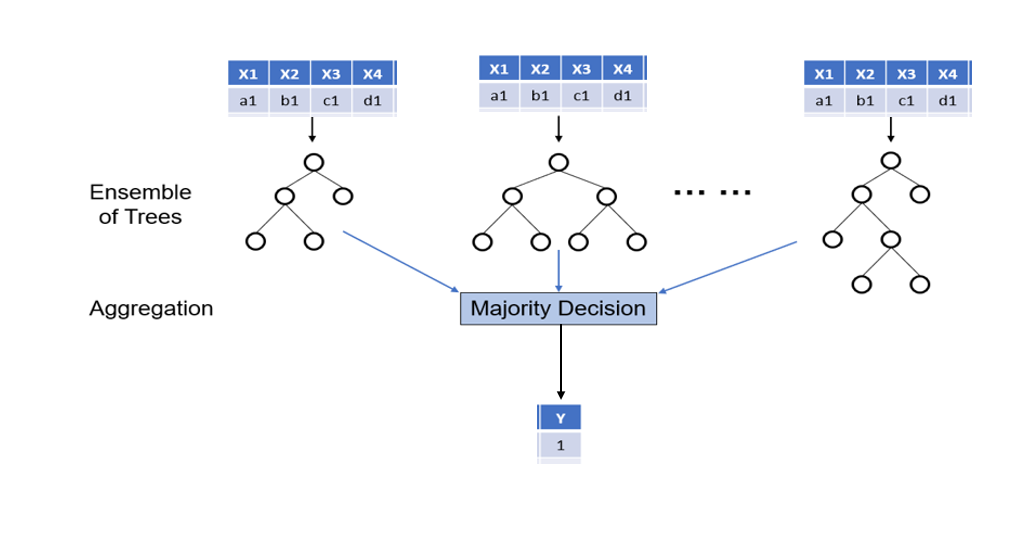

- Although random forests don't offer the same level of interpretability as decision trees, a big advantage of random forests is that we don't have to worry so much about the depth of trees since the majority vote can "absorb" the noise from individual trees. 


- Generally, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost. Another advantage is that the computational cost can be distributed to multiple cores/machines since each tree can grow independently.



- One caveat is that random forest works best with large datasets and using random forest on small datasets runs the risk of overfitting. Unlike RF, LR requires less number of samples. Complex models require large-sized dataset

##### Important Hyperparameters for Random Forest

> n_estimators --- controls number of trees in the random forest... increase in this hyperparameter leads to lower model variance and makes the model more generalizable at the cost of computation time

> max_features << the total number of available features --- a specific number of features are considered when splitting a node ...  a very low value of this hyperparameter will lead to distinct trees but those trees may have low generalizability due to underfitting... a very large value of this hyperparameter will slow down the performance of the random forest and it will make the trees similar; thereby increasing the model variance and lowering the generalizability...

> max_depth  --- controls the depth of each tree... increase in this hyperparameter leads to complex decision trees that tend to overfit....a low value of this hyperparameter will lead to underfitting and low generalizability 

> min_samples_split  --- controls the depth and complexity of each tree... decrease in this hyperparameter leads to complex decision treees that tend to overfit.. increase in this hyperparameter causes underfitting

> min_samples_leaf   --- controls the depth and complexity of each tree... decrease in this hyperparameter leads to complex decision treees that tend to overfit.. increase in this hyperparameter causes underfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Lecture7_TOC_Prediction_DataSet.xlsx')

In [3]:
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [4]:
df.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


In [26]:
# Calculate the correlation matrix 
#For multivariate analysis it is a good idea to check the correlation matrix.
#We can calculate it and view it in the console with these commands.

matrix = df.corr()
matrix

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
Thickness_ft,1.000000,-0.178338,-0.481222,0.111466,-0.061531,0.455295,0.024604
Bulk Density_gg per cc,-0.178338,1.000000,0.239369,-0.716448,0.272475,0.319666,-0.297897
Resistivity_ohmsm,-0.481222,0.239369,1.000000,-0.099508,0.034417,-0.452005,-0.184653
Effective Porosity_Fraction,0.111466,-0.716448,-0.099508,1.000000,-0.432895,-0.476787,0.422723
Clay Volume_ Fraction,-0.061531,0.272475,0.034417,-0.432895,1.000000,0.299816,-0.360168
Water Saturation_Fraction,0.455295,0.319666,-0.452005,-0.476787,0.299816,1.000000,-0.177222
TOC_Fraction,0.024604,-0.297897,-0.184653,0.422723,-0.360168,-0.177222,1.000000


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.


Let's use our function declared above to make a graphical correlation matrix visualization.  This may inprove our ability to spot features.  It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

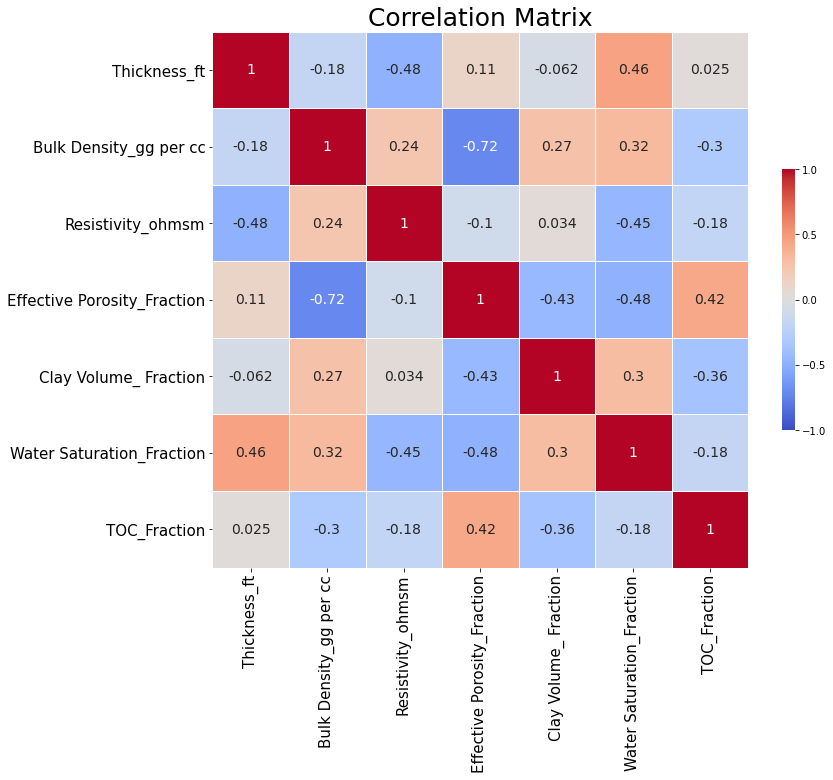

In [27]:
import seaborn as sns
# Let's use create graphical correlation matrix plot
# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 14})

# Setting Axis Properties
ax.set_yticklabels(matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 25)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  For more complete information, let's look at the matrix scatter plot from the Pandas package. 

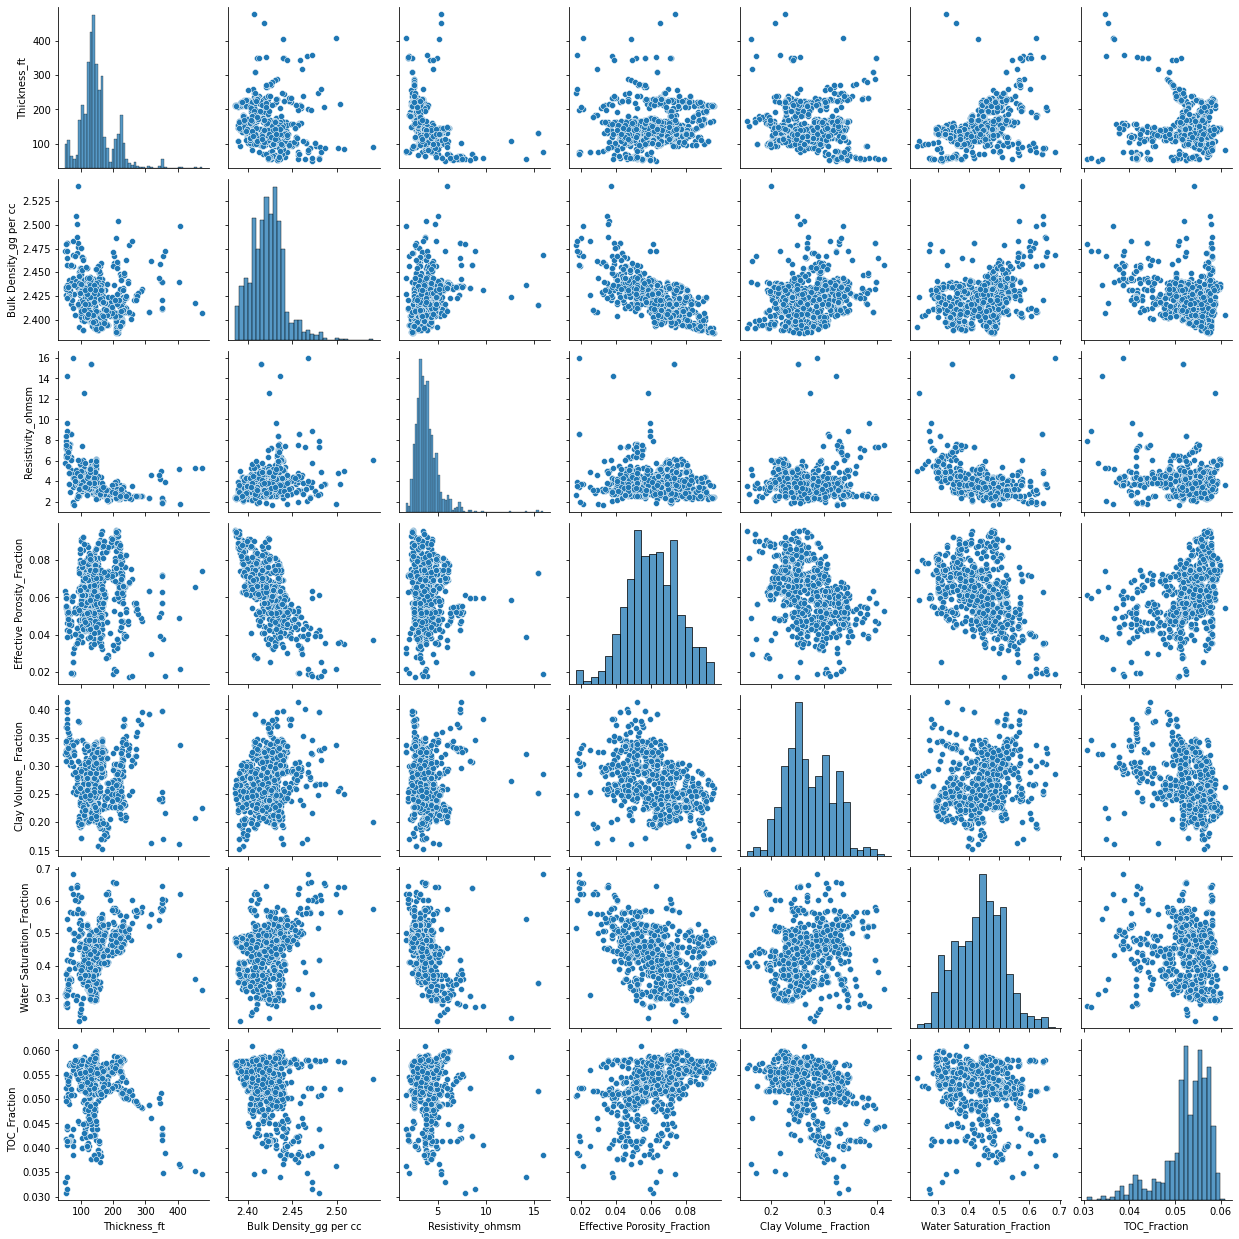

In [28]:
# Now let's view the scatterplot matrices from the seaborn Package 
# create pairplot 
sns.pairplot(df)

# to show
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  

In [5]:
y=df['TOC_Fraction']
x=df.drop(['TOC_Fraction'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
seed= 1000
np.random.seed(seed)

#split data into a 70/30 train/test split
X_train,X_test,y_train, y_test= train_test_split(x, y, test_size=0.30)

In [8]:
from sklearn.ensemble import RandomForestRegressor

Next, let’s define the parameters inside the "RandomForestRegressor."

In [9]:
np.random.seed(seed)
rf = RandomForestRegressor(n_estimators=5000, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2,
    max_features='auto', bootstrap=True, n_jobs=-1) 

There are multiple important hyper-tuning parameters within a random forest model such as "n_estimators," "criterion," "max_depth," etc. 
- "n_estimators": defines the number of trees in the forest. Usually the higher this number, the more accurate the model is without leading to overfitting. In the example, "n_estimators" is set to be 5000 which means 5000 independent decision trees will be constructed and the average of the 5000 trees will be used as the predicted value for each prediction row.
- "criterion" of "mse" was chosen for this model which means variance reduction is desired. Since bootstrapping aggregation that was discussed is desired to be chosen for this model, 
- "bootstrap" was set to "True." If "bootstrap" is set to "False," the whole data set is used to build each decision tree. 
- "n_jobs" is set to "-1"  means use all available cores

In [10]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4,
                      n_estimators=5000, n_jobs=-1)

In [11]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [12]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9659 R= 0.9828


In [13]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.8198 R= 0.9054


Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

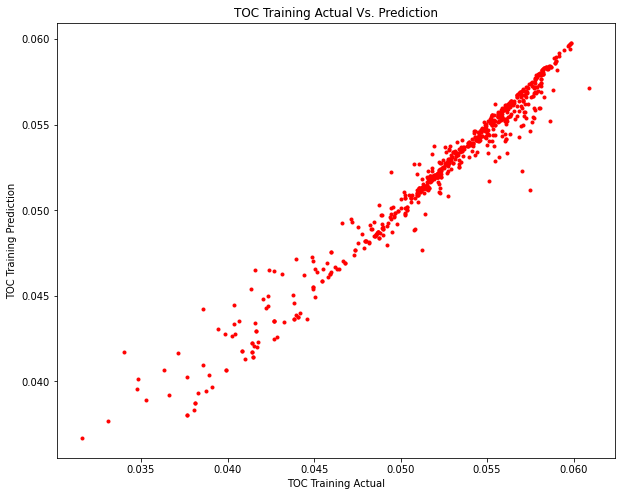

In [14]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'r.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'TOC Testing Actual Vs. Prediction')

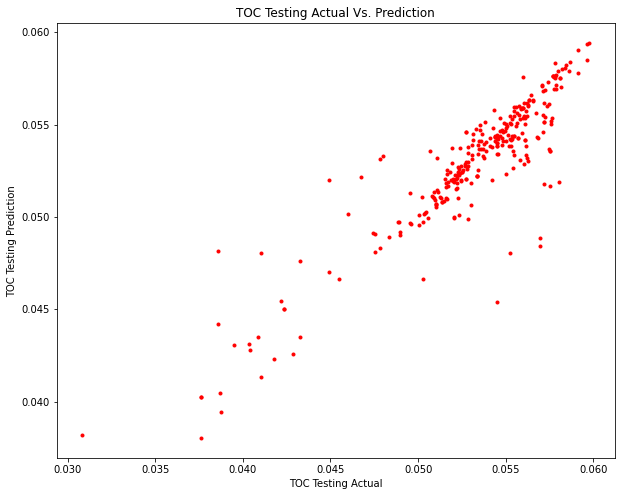

In [15]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'r.')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')

In [16]:
TOC_Actual_Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
TOC_Actual_Prediction

,Actual,Predicted
834,0.051979,0.052064
604,0.053110,0.054183
747,0.057625,0.055336
908,0.057235,0.055417
545,0.054575,0.053414
...,...,...
809,0.056807,0.054346
166,0.054815,0.054128
172,0.058651,0.058410
263,0.058120,0.057536


In [17]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.00117
MSE: 0.0
RMSE: 0.00201


Text(0.5, 1.0, 'Feature Importance Ranking')

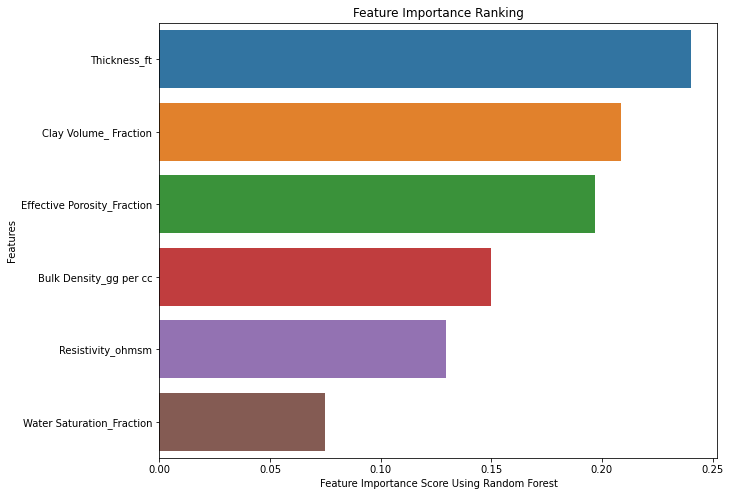

In [18]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

#### Cross Validation of the Original randomforest model (rf)

In [19]:
from sklearn.model_selection import cross_val_score
np.random.seed(seed)
scores_R2 = cross_val_score(rf, x, y,cv=5,scoring='r2')

print(" R2_Cross-validation scores: {}". format( scores_R2))
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 R2_Cross-validation scores: [0.76500527 0.78580918 0.74934118 0.82580832 0.75018098]
 Average R2_Cross-validation scores: 0.7752289852179434


#### Hyperparameter grid search

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
# Define an evaluation function for calculating some helpful metrics
# We can calculate the mean square error and the square root of the MSE for our prediction model.

def evaluate (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)

    print('r2 = {:0.5f}'.format(r2))
    print('MAE = {:0.5f}'.format(MAE))

In [21]:
#use a grid search pver a specified range of possible hyperparameters values
#On your own you can modify this section to look into other possible parameters
param_grid={
    'max_depth':[80,90],
    'max_features':['auto','sqrt','log2',None],
    'n_estimators':[10,15,100]
}

In [22]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      cv=10,n_jobs=-1,verbose=2)

In [23]:
# Perfom CV search over grid of hyperparameters
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.9s finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             min_samples_split=4,
                                             n_estimators=5000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [80, 90],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 15, 100]},
             verbose=2)

In [24]:
print('Best CV accuracy: {}, with parameters: {}'.format(
grid_search.best_score_,grid_search.best_params_))

Best CV accuracy: 0.7556602283306914, with parameters: {'max_depth': 90, 'max_features': 'auto', 'n_estimators': 100}


In [25]:
best_model=grid_search.best_estimator_
r2=evaluate(rf,X_test,y_test)

r2 = 0.80911
MAE = 0.00117
Mean Square Error = 0.00000
Squareroot Mean Square Error = 0.00201


Steps we've take:

1) Loaded data

2) EDA

3) Identified the feature Importance ranking

4) Split data into training/test

5) Cross Validation

6) Hyperparamter search

## Extra Trees

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
np.random.seed(seed)
et = ExtraTreesRegressor(n_estimators=5000, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2,
    max_features='auto', bootstrap=False, n_jobs=-1)

In [31]:
et.fit(X_train,y_train)

ExtraTreesRegressor(min_samples_leaf=2, min_samples_split=4, n_estimators=5000,
                    n_jobs=-1)

In [32]:
y_pred_train=et.predict(X_train)
y_pred_test=et.predict(X_test)

In [33]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9833 R= 0.9916


In [34]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.8666 R= 0.9309


Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

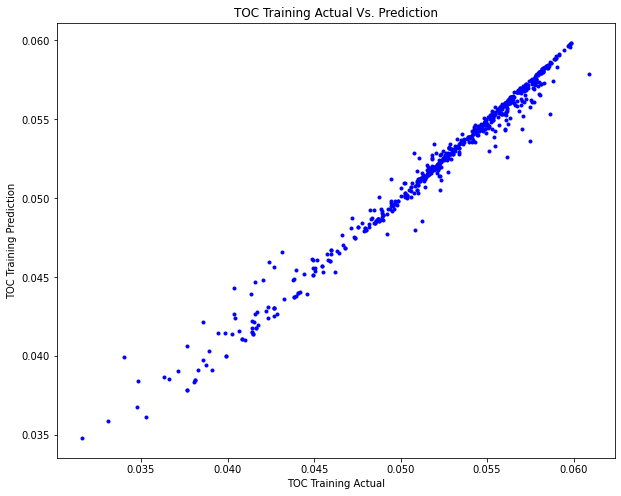

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'b.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'TOC Testing Actual Vs. Prediction')

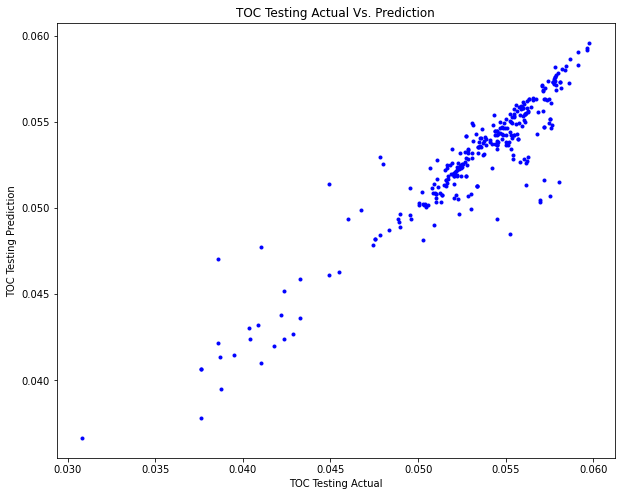

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')

In [37]:
TOC_Actual_Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
TOC_Actual_Prediction

,Actual,Predicted
834,0.051979,0.051963
604,0.053110,0.053889
747,0.057625,0.054802
908,0.057235,0.056310
545,0.054575,0.053810
...,...,...
809,0.056807,0.054305
166,0.054815,0.054230
172,0.058651,0.058633
263,0.058120,0.057309


In [38]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.00103
MSE: 0.0
RMSE: 0.00176


Text(0.5, 1.0, 'Feature Importance Ranking')

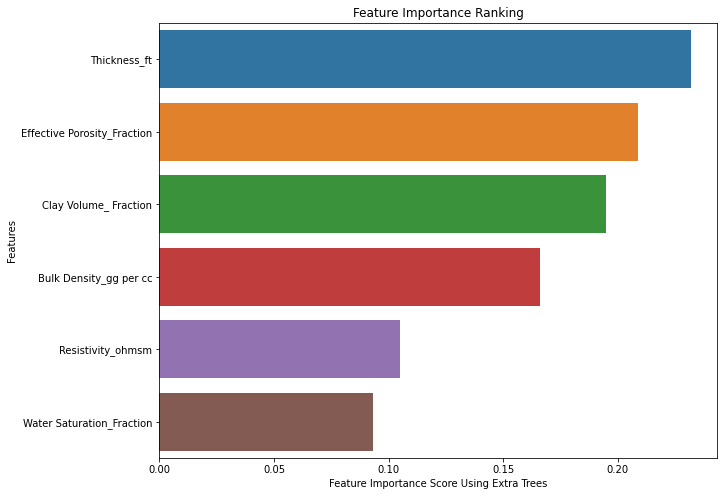

In [39]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(et.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Extra Trees')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

The overall feature ranking using the extra trees algorithm is similar to that of random forest. The top three features that have the highest impact on TOC appear to be thickness, effective porosity, and clay volume.

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
np.random.seed(seed)
scores_R2 = cross_val_score(et, x, y,cv=5,scoring='r2')

In [42]:
print(" R2_Cross-validation scores: {}". format( scores_R2))

 R2_Cross-validation scores: [0.79058329 0.82708083 0.7820333  0.84727738 0.80552067]


In [43]:
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores: 0.8104990915776948


When comparing the testing R2 from extra trees to that of random forest,
the testing R2 accuracy appears to be higher by a few percentages